# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Среднее специальное', 'Среднее', 'Два и более высших образования', 'Высшее', 'Неполное среднее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Разведен(а)', 'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Ресторанный бизнес/Общественное питание', 'Подбор персонала', 'Информационные услуги', 'ЧОП/Детективная д-ть', 'Химия/Парфюмерия/Фармацевтика', 'Сельское хозяйство', 'Юридические услуги/нотариальные услуги', 'Транспорт', 'Страхование', 'Банк/Финансы', 'Сборочные производства', 'Туризм', 'Недвижимость', 'Другие сферы', 'Управляющая компания', 'Коммунальное хоз-во/Дорожные службы', 'Наука', 'Строительство', 'Маркетинг', 'Нефтегазовая промышленность', 'Энергетика', 'СМИ/Реклама/PR-агенства', 'Салоны красоты и здоровья', 'Государственная служба', 'Образование', 'Торговля', 'Металлургия/Промышленность/Машиностроение', 'Информационные технологии', 'Здравоохранение', 'Логистика', 'Развлечения/Искусство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
#ищем столбцы с пропусками, считаем кол-во пропусков
for i in df.columns:
    nulls = df[i].isnull().sum() 
    if  nulls != 0:
        print(i,' ',nulls)
#делаем копию df
df_new = df.copy()

GEN_INDUSTRY   2713
GEN_TITLE   2713
ORG_TP_STATE   2713
ORG_TP_FCAPITAL   2708
JOB_DIR   2713
TP_PROVINCE   590
REGION_NM   2
WORK_TIME   2717
PREVIOUS_CARD_NUM_UTILIZED   29533


In [16]:
#Столбец PREVIOUS_CARD_NUM_UTILIZED - редко заполнен, убираем столбец
df_new = df_new.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis=1)

In [17]:
#Уберем оставшиеся строки с пропусками
for i in df_new.columns:
    df_new = df_new[~df_new[i].isnull()]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26840 entries, 0 to 30132
Data columns (total 52 columns):
AGREEMENT_RK               26840 non-null int64
TARGET                     26840 non-null int64
AGE                        26840 non-null int64
SOCSTATUS_WORK_FL          26840 non-null int64
SOCSTATUS_PENS_FL          26840 non-null int64
GENDER                     26840 non-null int64
CHILD_TOTAL                26840 non-null int64
DEPENDANTS                 26840 non-null int64
EDUCATION                  26840 non-null object
MARITAL_STATUS             26840 non-null object
GEN_INDUSTRY               26840 non-null object
GEN_TITLE                  26840 non-null object
ORG_TP_STATE               26840 non-null object
ORG_TP_FCAPITAL            26840 non-null object
JOB_DIR                    26840 non-null object
FAMILY_INCOME              26840 non-null object
PERSONAL_INCOME            26840 non-null object
REG_ADDRESS_PROVINCE       26840 non-null object
FACT_ADDRESS_PROV

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [19]:
#В столбце ORG_TP_FCAPITAL - 2 варианта значений, переведем в 0 и 1
df_new['ORG_TP_FCAPITAL'].map(lambda x: (x=='С участием')).astype(int)

0        0
2        0
3        0
4        0
6        0
7        0
9        0
10       0
11       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
29       0
31       0
32       0
33       0
34       0
35       0
36       0
        ..
30099    0
30100    0
30102    0
30103    0
30104    0
30105    0
30108    0
30109    0
30110    0
30111    0
30112    0
30113    0
30114    0
30115    0
30116    0
30117    0
30118    0
30119    0
30120    0
30121    0
30122    0
30123    0
30124    0
30125    1
30126    0
30127    0
30128    0
30129    0
30130    0
30132    0
Name: ORG_TP_FCAPITAL, Length: 26840, dtype: int32

In [20]:
#Применим OHN для столбцов: EDUCATION, MARITAL_STATUS, GEN_TITLE, ORG_TP_STATE, G,EN_INDUSTRY, ORG_TP_FCAPITAL, JOB_DIR, FAMILY_INCOME, REGION_NM
df_new = pd.get_dummies(df_new,columns = ['EDUCATION','MARITAL_STATUS','GEN_TITLE','ORG_TP_STATE','GEN_INDUSTRY','ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME','REGION_NM'])

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [21]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    #Удаляем идентификатор AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    #Избавляемся от проблем с '.' и ','
    for i in ['PERSONAL_INCOME','CREDIT','FST_PAYMENT','LOAN_AVG_DLQ_AMT','LOAN_MAX_DLQ_AMT']:
        df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
    
    #Удаляем столбец с пропусками
    df_output = df_output.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis=1)
    
    #Удаляем строки с пропусками
    for i in df_output.columns:
        df_output = df_output[~df_output[i].isnull()]
    
    #Кодируем категориальные признаки    
    df_output['ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL'].map(lambda x: (x=='С участием')).astype(int)
    df_output = pd.get_dummies(df_output,columns = ['EDUCATION','MARITAL_STATUS','GEN_TITLE','GEN_INDUSTRY','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME','REGION_NM'])
    
    #Удаляем строки с адресом
    df_output = df_output.drop(['REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE'], axis=1)
    return df_output

In [22]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [51]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

#Сохраняем целевую переменную отдельно
target = df_train_preproc['TARGET']
target_test = df_test_preproc['TARGET']

#Удаляем целевой столбец из train и test
df_train_preproc_no_target = df_train_preproc.drop(['TARGET'], axis=1)
df_test_preproc_no_target = df_test_preproc.drop(['TARGET'], axis=1)

#Делим выборку train на обучающую и тестовую
X, X_test, y, y_test = train_test_split(df_train_preproc_no_target, target, test_size=0.3, random_state=42)

#### Задание 5. Обучение и оценка качества разных моделей

In [52]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_DT = DecisionTreeClassifier()                     # инициализируем модель
model_DT.fit(X, y)                                      # обучаем модель
predict_DT = model_DT.predict(X_test)                      # делаем предсказание
predict_proba_DT = model_DT.predict_proba(X_test)         # вероятность

model_RF = RandomForestClassifier()                     # инициализируем модель
model_RF.fit(X, y)                                      # обучаем модель
predict_RF = model_RF.predict(X_test)                      # делаем предсказание
predict_proba_RF = model_RF.predict_proba(X_test)         # вероятность

model_LR = LogisticRegression()                         # инициализируем модель
model_LR.fit(X, y)                                      # обучаем модель
predict_LR = model_LR.predict(X_test)                      # делаем предсказание
predict_proba_LR = model_LR.predict_proba(X_test)         # вероятность


In [53]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

accuracy_DT = accuracy_score(y_test, predict_DT)
precision_DT = precision_score(y_test, predict_DT)
recall_DT = recall_score(y_test, predict_DT)
print('DecisionTreeClassifier:\n', accuracy_DT, precision_DT, recall_DT,'\n')
print(classification_report(y_test, predict_DT))

accuracy_RF = accuracy_score(y_test, predict_RF)
precision_RF = precision_score(y_test, predict_RF)
recall_RF = recall_score(y_test, predict_RF)
print('RandomForestClassifier\n', accuracy_RF, precision_RF, recall_RF,'\n')
print(classification_report(y_test, predict_RF))

accuracy_LR = accuracy_score(y_test, predict_LR)
precision_LR = precision_score(y_test, predict_LR)
recall_LR = recall_score(y_test, predict_LR)
print('LogisticRegression\n', accuracy_LR, precision_LR, recall_LR,'\n')
print(classification_report(y_test, predict_LR))

DecisionTreeClassifier:
 0.7757307786784574 0.14942528735632185 0.18724279835390947 

             precision    recall  f1-score   support

          0       0.89      0.86      0.87      3585
          1       0.15      0.19      0.17       486

avg / total       0.80      0.78      0.79      4071

RandomForestClassifier
 0.8786538933922869 0.21428571428571427 0.006172839506172839 

             precision    recall  f1-score   support

          0       0.88      1.00      0.94      3585
          1       0.21      0.01      0.01       486

avg / total       0.80      0.88      0.83      4071

LogisticRegression
 0.8796364529599607 0.0 0.0 

             precision    recall  f1-score   support

          0       0.88      1.00      0.94      3585
          1       0.00      0.00      0.00       486

avg / total       0.78      0.88      0.82      4071



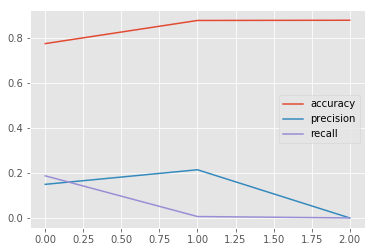

In [54]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно, вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

%matplotlib inline
from matplotlib import pyplot as plt

accuracy = [accuracy_DT,accuracy_RF,accuracy_LR]
precision = [precision_DT,precision_RF,precision_LR]
recall = [recall_DT,recall_RF,recall_LR]
plt.plot(accuracy, label = 'accuracy')
plt.plot(precision, label = 'precision')
plt.plot(recall, label = 'recall')
plt.legend()
plt.show()


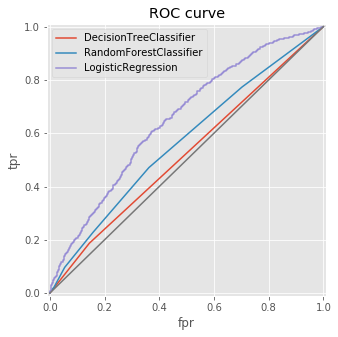

In [55]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой модели
# Подпишите оси и линии

from sklearn.metrics import roc_auc_score, roc_curve

fpr_DT, tpr_DT, thresholds = roc_curve(y_test, predict_proba_DT[:,1])
fpr_RF, tpr_RF, thresholds = roc_curve(y_test, predict_proba_RF[:,1])
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, predict_proba_LR[:,1])

plt.figure(figsize=(5, 5))

plt.plot(fpr_DT, tpr_DT, label = 'DecisionTreeClassifier')
plt.plot(fpr_RF, tpr_RF, label = 'RandomForestClassifier')
plt.plot(fpr_LR, tpr_LR, label = 'LogisticRegression')

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()
plt.show()

In [60]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

rfc_DT = DecisionTreeClassifier()
roc_auc_DT = cross_val_score(rfc_DT, df_train_preproc_no_target, target, scoring='roc_auc', cv=10)
roc_auc_DT_mean = roc_auc_DT.mean()

rfc_RF = RandomForestClassifier()
roc_auc_RF = cross_val_score(rfc_RF, df_train_preproc_no_target, target, scoring='roc_auc', cv=10)
roc_auc_RF_mean = roc_auc_RF.mean()

rfc_LR = LogisticRegression()
roc_auc_LR = cross_val_score(rfc_LR, df_train_preproc_no_target, target, scoring='roc_auc', cv=10)
roc_auc_LR_mean = roc_auc_LR.mean()

print('ROC_AUC')
print('DecisionTreeClassifier:\n', roc_auc_DT,'\n')
print('RandomForestClassifier:\n', roc_auc_RF,'\n')
print('LogisticRegression:\n', roc_auc_LR, '\n')

print('MEAN ROC_AUC')
print('DecisionTreeClassifier: ', roc_auc_DT_mean)
print('RandomForestClassifier: ',roc_auc_RF_mean)
print('LogisticRegression: ', roc_auc_LR_mean)


ROC_AUC
DecisionTreeClassifier:
 [0.51010496 0.52728468 0.51085809 0.5374604  0.53410585 0.51085809
 0.53703953 0.49097733 0.51304714 0.54707792] 

RandomForestClassifier:
 [0.56137622 0.56719562 0.61369613 0.59296117 0.57065975 0.58831909
 0.54435379 0.56436156 0.52488175 0.58636464] 

LogisticRegression:
 [0.63465395 0.6013737  0.62393162 0.61992708 0.61693364 0.53654394
 0.60421274 0.62191939 0.60879129 0.60662678] 

MEAN ROC_AUC
DecisionTreeClassifier:  0.5218813982197885
RandomForestClassifier:  0.5714169745444005
LogisticRegression:  0.6074914132192658


In [61]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

predict = model_LR.predict_proba(df_test_preproc_no_target)

roc_auc:  0.6348844396739529


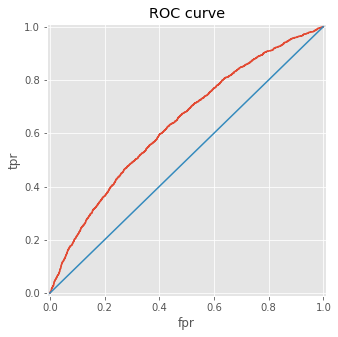

In [67]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

print('roc_auc: ', roc_auc_score(target_test, predict[:,1]))

fpr, tpr, thresholds = roc_curve(target_test, predict[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.show()


### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)